<a href="https://colab.research.google.com/github/suacalis/Isten-Ayrilma-Egiliminin-Makine-Ogrenmesi-ile-Analizi/blob/main/%C4%B0%C5%9Ften_Ayr%C4%B1lma_E%C4%9Filiminin_Makine_%C3%96%C4%9Frenmesi_ile_Analizi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df= pd.read_csv('https://raw.githubusercontent.com/suacalis/employee_attrition/master/WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [4]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


Exploratory Data Analysis (EDA)

These features come with the following label encoding:

Education: 1 'Below College' 2 'College' 3 'Bachelor' 4 'Master' 5 'Doctor'

EnvironmentSatisfaction: 1 'Low' 2 'Medium' 3 'High' 4 'Very High'

JobInvolvement: 1 'Low' 2 'Medium' 3 'High' 4 'Very High'

JobSatisfaction: 1 'Low' 2 'Medium' 3 'High' 4 'Very High'

PerformanceRating: 1 'Low' 2 'Average' 3 'Good' 4 'Excellent' 5 'Outstanding'

RelationshipSatisfaction: 1 'Low' 2 'Medium' 3 'High' 4 'Very High'

WorkLifeBalance: 1 'Bad' 2 'Good' 3 'Better' 4 'Best'

In [5]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [6]:
# proportion of Attrition, class is imbalance
print(df.Attrition.value_counts())
print(df.Attrition.value_counts(normalize=True))

No     1233
Yes     237
Name: Attrition, dtype: int64
No     0.838776
Yes    0.161224
Name: Attrition, dtype: float64


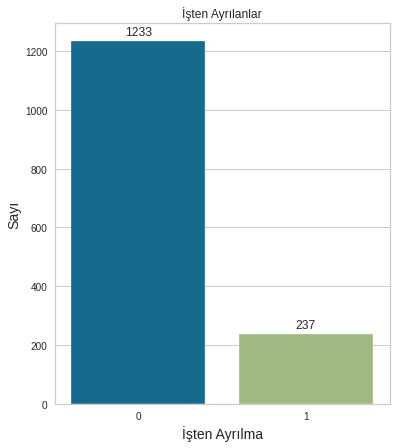

In [66]:
plt.figure(figsize=(6,7))
plt.title('İşten Ayrılanlar')
splot= sns.countplot(x="Attrition", data=df)
#splot= df['Attrition'].value_counts().plot(kind='bar', color=('C0','C1')).set_title('Attrition')
for p in splot.patches:
    splot.annotate(format(p.get_height()), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')
plt.xlabel("İşten Ayrılma", size=14)
plt.ylabel("Sayı", size=14);
#splot.annotate(format(p.get_height()#, '.1f'),

20.704225352112676
4.146589863793162


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


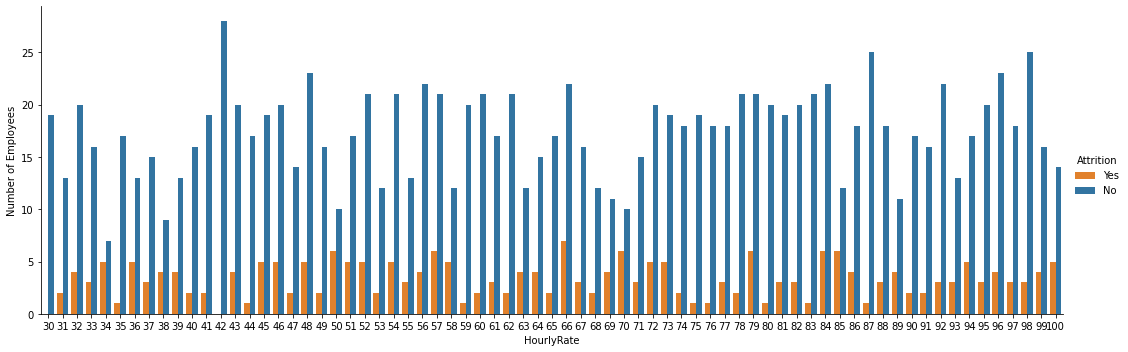

In [8]:
import numpy as np
# to plot employee distribution by HourlyRate, with distinct Attrition classes
# Average count of 20 employees in each HourlyRate class from 30 to 100
print(df.HourlyRate.value_counts().mean())
print(np.std(df.HourlyRate.value_counts()))
sns.axes_style('whitegrid')
sns.catplot('HourlyRate', data=df, aspect=3, kind='count', hue='Attrition', palette=['C1', 'C0']).set_ylabels('Number of Employees');

In [9]:
# HourRate has a mean of 65.9 and stdev of 20.3
print(df.HourlyRate.mean())
print(np.std(df.HourlyRate))

65.89115646258503
20.322511646324006


In [10]:
# to check mean & stdev of hourly rate for those Attrition=='No'
print(df[df.Attrition=='No']['HourlyRate'].mean())
print(np.std(df[df.Attrition=='No']['HourlyRate']))

65.9521492295215
20.37248786486743


In [11]:
# to check mean & stdev of hourly rate for those Attrition=='Yes'
print(df[df.Attrition=='Yes']['HourlyRate'].mean())
print(np.std(df[df.Attrition=='Yes']['HourlyRate']))

65.57383966244726
20.057507807158082


/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


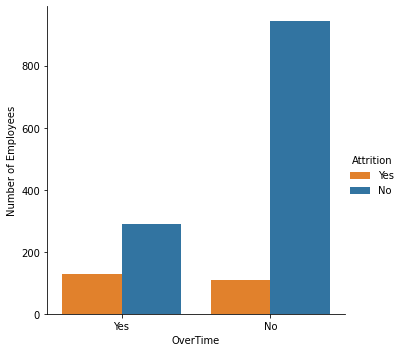

In [12]:
# to plot employee distribution by OverTime, with distinct Attrition classes
sns.axes_style('whitegrid')
sns.factorplot("OverTime", data=df, aspect=1, kind='count', hue='Attrition', palette=['C1', 'C0']).set_ylabels('Number of Employees');

In [13]:
# employees have background in these EducationField 
df.EducationField.value_counts()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

In [14]:
# to analyse JobRole in each Department
for dpmt in df['Department'].unique():
    print('\n', dpmt, ':')
    print(df[df['Department']==dpmt]['JobRole'].value_counts())


 Sales :
Sales Executive         326
Sales Representative     83
Manager                  37
Name: JobRole, dtype: int64

 Research & Development :
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Research Director             80
Manager                       54
Name: JobRole, dtype: int64

 Human Resources :
Human Resources    52
Manager            11
Name: JobRole, dtype: int64


In [15]:
# to create new feature whether JobRole is related to EducationField, 0 = not related, 1 = related, 2 = somewhat related
# HR seems to have done fabulously in job matching as this feature did not emerge useful
df['EduField_Dept'] = 0
for i, row in df.iterrows():
    if row['EducationField']=='Human Resources' and row['Department']=='Human Resources':
        df['EduField_Dept'][i] = 1
    elif row['EducationField']=='Life Sciences' and row['Department']=='Sales':
        df['EduField_Dept'][i] = 2
    elif row['EducationField']=='Life Sciences' and row['Department']=='Research & Development':
        df['EduField_Dept'][i] = 1
    elif row['EducationField']=='Medical' and row['Department']=='Sales':
        df['EduField_Dept'][i] = 2
    elif row['EducationField']=='Medical' and row['Department']=='Research & Development':
        df['EduField_Dept'][i] = 1
    elif row['EducationField']=='Technical Degree' and row['Department']=='Sales':
        df['EduField_Dept'][i] = 2
    elif row['EducationField']=='Technical Degree' and row['Department']=='Research & Development':
        df['EduField_Dept'][i] = 1
    elif row['EducationField']=='Marketing' and row['Department']=='Sales':
        df['EduField_Dept'][i] = 1
        
# for index, row in df.iterrows():
#     print(row['EducationField'], '->', row['Department'], '=>', row['EduField_Dept'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_laun

In [16]:
# to define new features (divide by something+1 to prevent division by zero)
df['Job_Coy'] = df['JobLevel'] / (df['YearsAtCompany'] + 1)
df['Edu_Age_TotalWorking'] = df['Education'] / (df['Age'] + df['TotalWorkingYears'])
df['CurrMgr_Coy'] = df['YearsWithCurrManager'] / (df['YearsAtCompany'] + 1)
df['CurrRole_CurrMgr'] = df['YearsInCurrentRole'] / (df['YearsWithCurrManager'] + 1)
# df

In [17]:
# to check for categorical type columns and each unique values
for col in df.select_dtypes(['object']).columns:
    print(col, ':', sorted(df[col].unique()))

Attrition : ['No', 'Yes']
BusinessTravel : ['Non-Travel', 'Travel_Frequently', 'Travel_Rarely']
Department : ['Human Resources', 'Research & Development', 'Sales']
EducationField : ['Human Resources', 'Life Sciences', 'Marketing', 'Medical', 'Other', 'Technical Degree']
Gender : ['Female', 'Male']
JobRole : ['Healthcare Representative', 'Human Resources', 'Laboratory Technician', 'Manager', 'Manufacturing Director', 'Research Director', 'Research Scientist', 'Sales Executive', 'Sales Representative']
MaritalStatus : ['Divorced', 'Married', 'Single']
Over18 : ['Y']
OverTime : ['No', 'Yes']


In [18]:
# to drop useless features
df = df.drop(columns=['Over18', 'EmployeeCount', 'EmployeeNumber', 'StandardHours'])

# label encoding to clean up categorical data
categorical_data = {
    'Attrition': {'No':0, 'Yes':1}, 
    'BusinessTravel': {'Non-Travel':0, 'Travel_Frequently':1, 'Travel_Rarely':2}, 
    'Department': {'Human Resources':0, 'Research & Development':1, 'Sales':2}, 
    'EducationField': {'Human Resources':0, 'Life Sciences':1, 'Marketing':2, 'Medical':3, 'Technical Degree':4, 'Other':5}, 
    'Gender': {'Female':0, 'Male':0}, 
    'JobRole': {'Healthcare Representative':0, 'Human Resources':1, 'Laboratory Technician':2, 'Manager':3, 'Manufacturing Director':4, 'Research Director':5, 'Research Scientist':6, 'Sales Executive':7, 'Sales Representative':8}, 
    'MaritalStatus': {'Divorced':0, 'Single':1, 'Married':2}, 
    #'Over18': {'Y':1}, 
    'OverTime': {'No':0, 'Yes':1}    }
df = df.replace(categorical_data)
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,EduField_Dept,Job_Coy,Edu_Age_TotalWorking,CurrMgr_Coy,CurrRole_CurrMgr
0,41,1,2,1102,2,1,2,1,2,0,94,3,2,7,4,1,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5,2,0.285714,0.040816,0.714286,0.666667
1,49,0,1,279,1,8,1,1,3,0,61,2,2,6,2,2,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7,1,0.181818,0.016949,0.636364,0.875000
2,37,1,2,1373,1,2,2,5,4,0,92,2,1,2,3,1,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0,0,1.000000,0.045455,0.000000,0.000000
3,33,0,1,1392,1,3,4,1,4,0,56,3,1,6,3,2,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0,1,0.111111,0.097561,0.000000,7.000000
4,27,0,2,591,1,2,1,3,1,0,40,3,1,2,2,2,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2,1,0.333333,0.030303,0.666667,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,1,884,1,23,2,3,3,0,41,4,2,2,4,2,2571,12290,4,0,17,3,3,1,17,3,3,5,2,0,3,1,0.333333,0.037736,0.500000,0.500000
1466,39,0,2,613,1,6,1,3,4,0,42,2,3,0,1,2,9991,21457,4,0,15,3,1,1,9,5,3,7,7,1,7,1,0.375000,0.020833,0.875000,0.875000
1467,27,0,2,155,1,4,3,1,2,0,87,4,2,4,2,2,6142,5174,1,1,20,4,2,1,6,0,3,6,2,0,3,1,0.285714,0.090909,0.428571,0.500000
1468,49,0,1,1023,2,2,3,3,4,0,63,2,2,7,2,2,5390,13243,2,0,14,3,4,0,17,3,2,9,6,0,8,2,0.200000,0.045455,0.800000,0.666667


In [19]:
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC, SVC
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, auc, roc_curve, log_loss
SEED = 42

Top 10 Features: ['OverTime', 'MonthlyIncome', 'TotalWorkingYears', 'Age', 'StockOptionLevel', 'YearsAtCompany', 'Edu_Age_TotalWorking', 'JobLevel', 'YearsWithCurrManager', 'CurrMgr_Coy']


(11.5, -0.5)

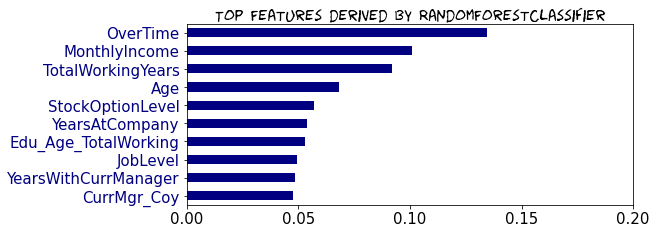

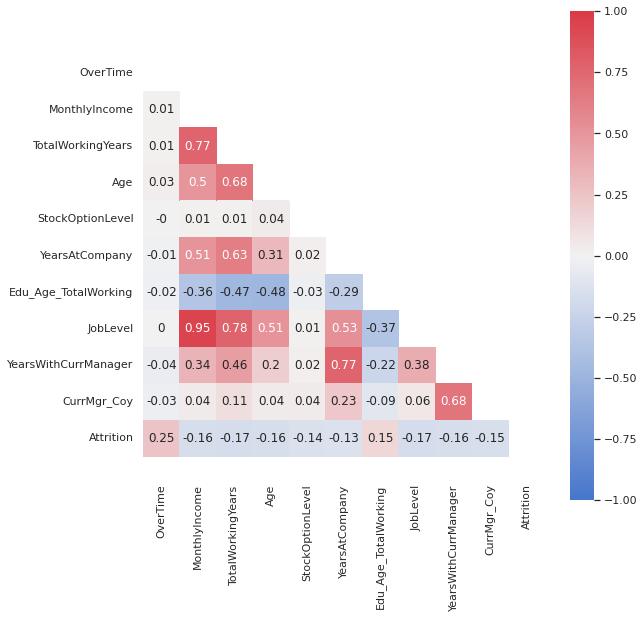

In [20]:
# define feature X and target y dataset (X and y are commonly used in sklearn)
X, y = df.drop('Attrition', axis=1), df['Attrition']

# use RandomForestClassifier to look for important key features
n = 10    # specify n (top n features)
rfc = RandomForestClassifier(random_state=SEED, n_estimators=200, max_depth=3)
rfc_model = rfc.fit(X, y)
pd.Series(rfc_model.feature_importances_, index=X.columns).nlargest(n).plot(kind='barh', 
    figsize=[8, n/3], color='navy').invert_yaxis()    # most important feature is on top, ie, descending order
ticks_x = np.linspace(0, 0.2, 5)   # (start, end, number of ticks)
plt.xticks(ticks_x, fontsize=15, color='black')
plt.yticks(size=15, color='navy' )
plt.title('Top Features derived by RandomForestClassifier', family='fantasy', size=15)
top10_features = pd.Series(rfc_model.feature_importances_, index=X.columns).nlargest(10)
print('Top 10 Features:', list(top10_features.index))

# check for correlation between top 10 features
X = df.loc[:, top10_features.index]
y = df['Attrition']
df_top10 = X.join(y)
# correlation matrix heatmap visualization
sns.set(style="white")
# Generate a mask for the upper triangle
mask = np.zeros_like(df_top10.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
# Set up the matplotlib figure to control size of heatmap
fig, ax = plt.subplots(figsize=(9,9))
# Create a custom color palette
cmap = sns.diverging_palette(255, 10, as_cmap=True)  # as_cmap returns a matplotlib colormap object rather than a list of colors
# Red=10, Green=128, Blue=255
# Plot the heatmap
sns.heatmap(df_top10.corr().round(2), mask=mask, annot=True, annot_kws={"size": 12}, square=True, 
            cmap=cmap , vmin=-1, vmax=1, ax=ax)  # annot=True display corr label
# Prevent Heatmap Cut-Off Issue
bottom, top = ax.get_ylim()
ax.set_ylim(bottom+0.5, top-0.5)

In [21]:
# drop highly correlated features: JobLevel & MonthlyIncome = 0.95 (JobLevel has lower feature importance)
df = df.drop(columns=['JobLevel'])

In [22]:
# re-run correlation matrix heatmap: TotalWorkingYears & MonthlyIncome = 0.77, YearsWithCurrManager & YearsAtCompany = 0.77
df = df.drop(columns=['TotalWorkingYears', 'YearsWithCurrManager'])

In [23]:
# re-run correlation matrix heatmap: YearsInCurrentRole & YearsAtCompany = 0.76
df = df.drop(columns=['YearsInCurrentRole'])

In [24]:
# re-run correlation matrix heatmap: YearsAtCompany & MonthlyIncome = 0.51
df = df.drop(columns=['YearsAtCompany'])

In [25]:
# re-run correlation matrix heatmap: Age & MonthlyIncome = 0.5
df = df.drop(columns=['Age'])

In [58]:
df

,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,WorkLifeBalance,YearsSinceLastPromotion,EduField_Dept,Job_Coy,Edu_Age_TotalWorking,CurrMgr_Coy,CurrRole_CurrMgr
0,1,2,1102,2,1,2,1,2,0,94,3,7,4,1,5993,19479,8,1,11,3,1,0,0,1,0,2,0.285714,0.040816,0.714286,0.666667
1,0,1,279,1,8,1,1,3,0,61,2,6,2,2,5130,24907,1,0,23,4,4,1,3,3,1,1,0.181818,0.016949,0.636364,0.875000
2,1,2,1373,1,2,2,5,4,0,92,2,2,3,1,2090,2396,6,1,15,3,2,0,3,3,0,0,1.000000,0.045455,0.000000,0.000000
3,0,1,1392,1,3,4,1,4,0,56,3,6,3,2,2909,23159,1,1,11,3,3,0,3,3,3,1,0.111111,0.097561,0.000000,7.000000
4,0,2,591,1,2,1,3,1,0,40,3,2,2,2,3468,16632,9,0,12,3,4,1,3,3,2,1,0.333333,0.030303,0.666667,0.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0,1,884,1,23,2,3,3,0,41,4,2,4,2,2571,12290,4,0,17,3,3,1,3,3,0,1,0.333333,0.037736,0.500000,0.500000
1466,0,2,613,1,6,1,3,4,0,42,2,0,1,2,9991,21457,4,0,15,3,1,1,5,3,1,1,0.375000,0.020833,0.875000,0.875000
1467,0,2,155,1,4,3,1,2,0,87,4,4,2,2,6142,5174,1,1,20,4,2,1,0,3,0,1,0.285714,0.090909,0.428571,0.500000
1468,0,1,1023,2,2,3,3,4,0,63,2,7,2,2,5390,13243,2,0,14,3,4,0,3,2,0,2,0.200000,0.045455,0.800000,0.666667


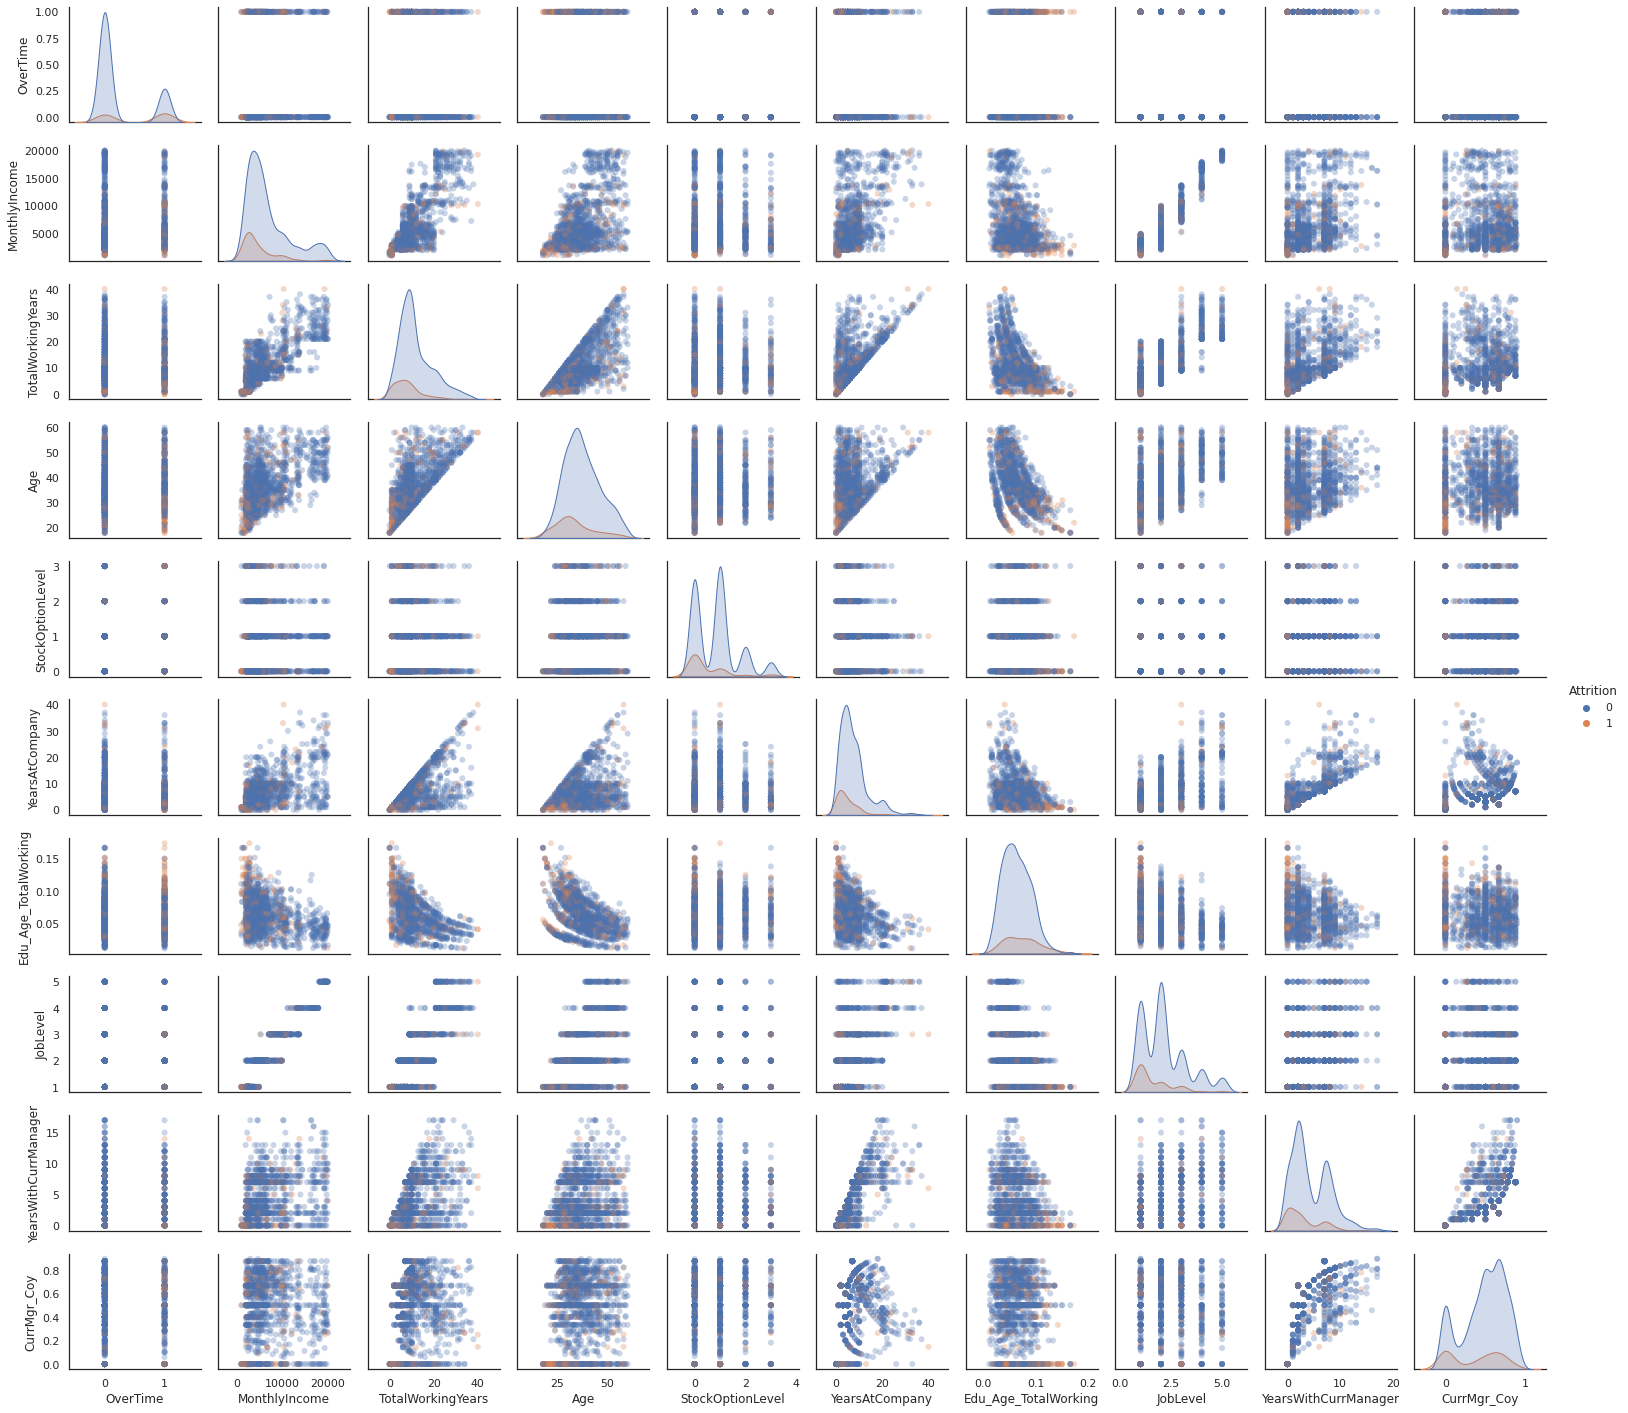

In [26]:
# to visualise pair plot of top 10 features
sns.pairplot(df_top10, hue='Attrition', plot_kws=dict(alpha=.3, edgecolor='none'), height=2, aspect=1.1)

KeyError: ignored

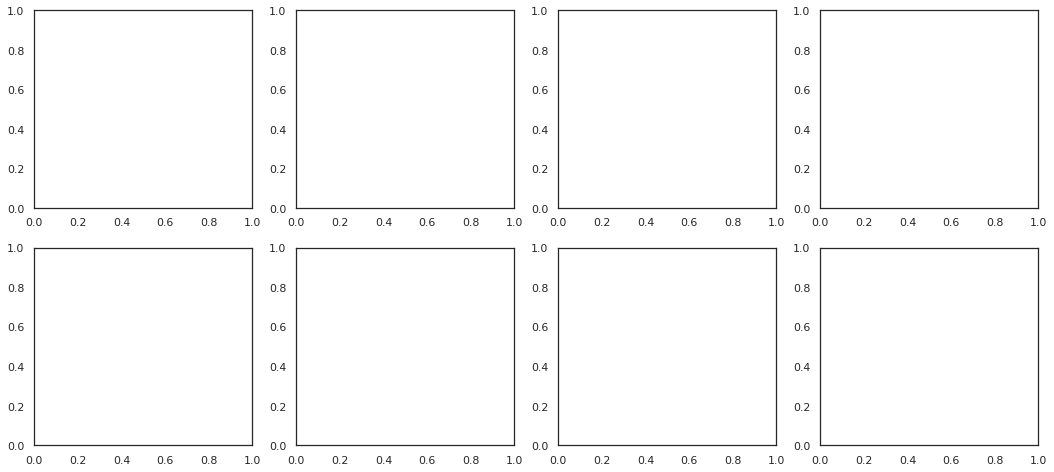

In [31]:
# analyse feature-outcome distribution in visualisation
features = list(top10_features.index)[0:8]   # visualise only the top 8 features

ROWS, COLS = 2, 4
fig, ax = plt.subplots(ROWS, COLS, figsize=(18,8) )
row, col = 0, 0
for i, feature in enumerate(features):
    if col == COLS - 1:
        row += 1
    col = i % COLS
    
#     df[feature].hist(bins=35, color='green', alpha=0.5, ax=ax[row, col]).set_title(feature)  #show all, comment off below 2 lines
df[df.Attrition==0][feature].hist(bins=35, color='blue', alpha=0.5, ax=ax[row, col]).set_title(feature)
df[df.Attrition==1][feature].hist(bins=35, color='orange', alpha=0.7, ax=ax[row, col])
    
plt.legend(['No Attrition', 'Attrition'])
fig.subplots_adjust(hspace=0.3)

Split data into 80:20 ratio, use cross validation to perform baseline model selection

Specify parameter "stratify=y" in the code so that the proportion of classes in the output dataset will have the same proportion as the stratify column provided. As target y has binary categorical classes with 84% '0's and 16% '1's, "stratify=y" will make sure that the 80:20 split has 84% of '0's and 16% of '1's in both output datasets.

Reference : http://www.kmdatascience.com/2017/07/k-folds-cross-validation-in-python.html

Cross Validation: use StratifiedKFold, as target class is imbalance.

Reference: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html#sklearn.model_selection.StratifiedKFold

In [74]:


In [32]:
# define feature X and target y dataset (X and y are commonly used in sklearn)
X, y = df.drop('Attrition', axis=1), df['Attrition']
print('X', X.shape, 'y', y.shape)

# split data to 80:20 ratio for train/test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=SEED, stratify=y)
print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test', X_test.shape)
print('y_test', y_test.shape)

# kf = KFold(n_splits=5, shuffle=True, random_state=SEED)   # this may result in imbalance classes in each fold
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=SEED)   # use this

X (1470, 29) y (1470,)
X_train (1176, 29)
y_train (1176,)
X_test (294, 29)
y_test (294,)


In [33]:
## BASELINE model performance evaluation
# to define which metric and model to use
met = {'accuracy':True, 'precision':True, 'recall':True, 'f1score':True, 'rocauc':True, 'logloss':True}
mod = {'gnb':True, 'bnb':True, 'mnb':True, 'logr':True, 'knn':True, 'dt':True, 'rf':True, 'xgb':False, 'svc':True, 'lsvc':True}

# to give model baseline performance report in dataframe 
def metric(model, X_train, X_test, y_train, y_test, name):
    accuracy1 = accuracy2 = precision = recall = f1score = rocauc = logloss = 0.0
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    if met['accuracy']:
        accuracy1 = np.mean(cross_val_score(model, X_train, y_train, cv=kf, scoring='accuracy'))
        accuracy2 = accuracy_score(y_test, y_pred)
    if met['precision']: precision = np.mean(cross_val_score(model, X_train, y_train, cv=kf, scoring='precision'))
    if met['recall']:    recall    = np.mean(cross_val_score(model, X_train, y_train, cv=kf, scoring='recall'))
    if met['f1score']:   f1score   = np.mean(cross_val_score(model, X_train, y_train, cv=kf, scoring='f1'))
    if met['rocauc']:    rocauc    = np.mean(cross_val_score(model, X_train, y_train, cv=kf, scoring='roc_auc'))
    if met['logloss']:   logloss   = log_loss(y_test, y_pred)   # SVC & LinearSVC unable to use cvs

    return pd.DataFrame({'model'    : [name],
                         'accuracy' : [accuracy1],
                         'acc(test)': [accuracy2],
                         'precision': [precision],
                         'recall'   : [recall],
                         'f1score'  : [f1score],
                         'rocauc'   : [rocauc],
                         'logloss'  : [logloss],
                         'timetaken': [0.0]       })   # timetaken: to be used for comparison later

# to initialise an empty dataframe
rpt = pd.DataFrame({'model'    : [],
                    'accuracy' : [],
                    'acc(test)': [],
                    'precision': [],
                    'recall'   : [],
                    'f1score'  : [],
                    'rocauc'   : [],
                    'logloss'  : [],
                    'timetaken': []       })

# to initialise all baseline models
gnb = GaussianNB()
bnb = BernoulliNB()
mnb = MultinomialNB()
logr = LogisticRegression()
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
xgb = XGBClassifier()
svc = SVC()
lsvc = LinearSVC()

if mod['gnb']:  rpt = pd.concat([rpt, metric(gnb, X_train, X_test, y_train, y_test, 'GaussianNB')])   # default axis=0
if mod['bnb']:  rpt = pd.concat([rpt, metric(bnb, X_train, X_test, y_train, y_test, 'BernoulliNB')])
if mod['mnb']:  rpt = pd.concat([rpt, metric(mnb, X_train, X_test, y_train, y_test, 'MultinomialNB')])
if mod['logr']: rpt = pd.concat([rpt, metric(logr, X_train, X_test, y_train, y_test, 'LogisticRegression')])
if mod['knn']:  rpt = pd.concat([rpt, metric(knn, X_train, X_test, y_train, y_test, 'KNearestNeighbour')])
if mod['dt']:   rpt = pd.concat([rpt, metric(dt, X_train, X_test, y_train, y_test, 'DecisionTree')])
if mod['rf']:   rpt = pd.concat([rpt, metric(rf, X_train, X_test, y_train, y_test, 'RandomForest')])
if mod['xgb']:  rpt = pd.concat([rpt, metric(xgb, X_train, X_test, y_train, y_test, 'XGBoost')])
if mod['svc']:  rpt = pd.concat([rpt, metric(svc, X_train, X_test, y_train, y_test, 'SVC')])
if mod['lsvc']: rpt = pd.concat([rpt, metric(lsvc, X_train, X_test, y_train, y_test, 'LinearSVC')])
rpt = rpt.reset_index(drop=True)
display(rpt)

## TUNED model performance evaluation
def tuning(model, X_train, X_test, y_train, y_test, name):
    print('\nSearch for OPTIMAL THRESHOLD, vary from 0.0001 to 0.9999, fit/predict on train/test data')
    model.fit(X_train, y_train)
    optimal_th = 0.5   # start with default threshold value
    
    for i in range(0,3):
        score_list = []
        print('\nLooping decimal place', i+1) 
        th_list = [np.linspace(optimal_th-0.4999, optimal_th+0.4999, 11), 
                   np.linspace(optimal_th-0.1,    optimal_th+0.1,    21), 
                   np.linspace(optimal_th-0.01,   optimal_th+0.01,   21)]
        for th in th_list[i]:
            if th<0: 
                score_list.append(-1)
                continue
            y_pred = (model.predict_proba(X_test)[:,1] >= th)
            f1scor = f1_score(y_test, y_pred)
            score_list.append(f1scor)
            print('{:.3f}->{:.4f}'.format(th, f1scor), end=',  ')   # display f1score in 4 decimal pl
        optimal_th = float(th_list[i][score_list.index(max(score_list))])

    print('optimal F1 score = {:.4f}'.format(max(score_list)))
    print('optimal threshold = {:.3f}'.format(optimal_th))

    print('\n', name, 'accuracy score is')
    accuracy1 = model.score(X_train, y_train)   # .score uses accuracy
    print('Training: {:.2f}%'.format(100*accuracy1))
    accuracy2 = model.score(X_test, y_test)
    print('Test set: {:.2f}%'.format(100*accuracy2))

    y_pred = (model.predict_proba(X_test)[:,1] >= 0.25)
    print('\nAdjust threshold to 0.25:')
    print('Precision: {:.4f},   Recall: {:.4f},   F1 Score: {:.4f}'.format(
        precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred)))
    print(confusion_matrix(y_test, y_pred))

    y_pred = model.predict(X_test)
    print('Default threshold of 0.50:')
    print('Precision: {:.4f},   Recall: {:.4f},   F1 Score: {:.4f}'.format(
        precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred)))
    print(confusion_matrix(y_test, y_pred))

    y_pred = (model.predict_proba(X_test)[:,1] >= 0.75)
    print('Adjust threshold to 0.75:')
    print('Precision: {:.4f},   Recall: {:.4f},   F1 Score: {:.4f}'.format(
        precision_score(y_test, y_pred), recall_score(y_test, y_pred), f1_score(y_test, y_pred)))
    print(confusion_matrix(y_test, y_pred))

    y_pred = (model.predict_proba(X_test)[:,1] >= optimal_th)
#     y_pred = [1 if x==True else 0 if x==False else x for x in y_pred]   # .predict->0/1; .predict_proba->False/True
    print('\nOptimal threshold {:.3f}'.format(optimal_th))
    precision    = precision_score(y_test, y_pred)
    recall       = recall_score(y_test, y_pred)
    f1score      = f1_score(y_test, y_pred)
    print('Precision: {:.4f},   Recall: {:.4f},   F1 Score: {:.4f}'.format(precision, recall, f1score))
    print(name, 'confusion matrix: \n', confusion_matrix(y_test, y_pred))
    
    y_pred = model.predict_proba(X_test)[:,1]   # use this at optimal th, for AUC and logloss
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    rocauc       = auc(fpr, tpr)
    print(name, 'AUC: {:.4f}'.format(rocauc))
    logloss      = log_loss(y_test, y_pred)   # same result using y_pred = model.predict_proba(X_test)
    print(name, 'Log-loss: {:.4f}'.format(logloss))

    return pd.DataFrame({'model'    : [name],
                         'accuracy' : [accuracy1],
                         'acc(test)': [accuracy2],
                         'precision': [precision],
                         'recall'   : [recall],
                         'f1score'  : [f1score],
                         'rocauc'   : [rocauc],
                         'logloss'  : [logloss],
                         'timetaken': [1000]       })   # timetaken: to be used for comparison late

# to initialise an empty dataframe
tuned = pd.DataFrame({'model'    : [],
                    'accuracy' : [],
                    'acc(test)': [],
                    'precision': [],
                    'recall'   : [],
                    'f1score'  : [],
                    'rocauc'   : [],
                    'logloss'  : [],
                    'timetaken': []       })

if mod['gnb']:
    print('\n"""""" GaussianNB """"""')
    time1 = time.time()
    gnb = GaussianNB()
    model_tuned = tuning(gnb, X_train, X_test, y_train, y_test, 'GaussianNB')
    model_tuned.timetaken[0] = time.time() - time1
    tuned = pd.concat([tuned, model_tuned])   # default axis=0

if mod['bnb']:
    print('\n"""""" BernoulliNB """"""')
    time1 = time.time()
    bnb = BernoulliNB()
    model_tuned = tuning(bnb, X_train, X_test, y_train, y_test, 'BernoulliNB')
    model_tuned.timetaken[0] = time.time() - time1
    tuned = pd.concat([tuned, model_tuned])   # default axis=0

if mod['mnb']:
    print('\n"""""" MultinomialNB """"""')
    time1 = time.time()
    mnb = MultinomialNB()
    model_tuned = tuning(mnb, X_train, X_test, y_train, y_test, 'MultinomialNB')
    model_tuned.timetaken[0] = time.time() - time1
    tuned = pd.concat([tuned, model_tuned])   # default axis=0

if mod['logr']:
    print('\n"""""" LogisticRegression """"""')
    time1 = time.time()
    print('\nSearch for optimal hyperparameter C in LogisticRegresssion, vary C from 0.001 to 1000, using KFold CV on train data')
    score_list = []
    c_list = 10**np.linspace(-3,3,200)
    for c in c_list:
        logr = LogisticRegression(C = c)
        cvs = (cross_val_score(logr, X_train, y_train, cv=kf, scoring='f1')).mean()
        score_list.append(cvs)
        print('{:.4f}'.format(cvs), end=", ")   # 4 decimal pl
    print('optimal cv F1 score = {:.4f}'.format(max(score_list)))
    optimal_c = float(c_list[score_list.index(max(score_list))])
    print('optimal value of C = {:.3f}'.format(optimal_c))
    logr = LogisticRegression(C = optimal_c)
    model_tuned = tuning(logr, X_train, X_test, y_train, y_test, 'LogisticRegression')
    model_tuned.timetaken[0] = time.time() - time1
    tuned = pd.concat([tuned, model_tuned])   # default axis=0
    
if mod['knn']:
    print('\n"""""" KNN """""" ')
    time1 = time.time()
    print('\nSearch for optimal hyperparameter K in KNN, vary K from 1 to 20, using KFold CV on train data')
    k_scores = []
    for k in range(1, 21):
        knn = KNeighborsClassifier(n_neighbors = k)
        cvs = cross_val_score(knn, X_train, y_train, cv=kf, scoring='f1').mean()
        k_scores.append(cvs)
        print('{:.4f}'.format(cvs), end=", ")
    print('optimal cv F1 score = {:.4f}'.format(max(k_scores)))   # 4 decimal pl
    optimal_k = k_scores.index(max(k_scores)) + 1   # index 0 is for k=1
    print('optimal value of K =', optimal_k)
    knn = KNeighborsClassifier(n_neighbors = optimal_k)
    model_tuned = tuning(knn, X_train, X_test, y_train, y_test, 'KNearestNeighbour')
    model_tuned.timetaken[0] = time.time() - time1
    tuned = pd.concat([tuned, model_tuned])   # default axis=0
    
if mod['dt']:
    print('\n"""""" DecisionTreeClassifier """"""')
    time1 = time.time()
    print('\nSearch for optimal max_depth in DecisionTree, vary from 2 to 10, using KFold CV on train data')
    d_scores = []
    for d in range(2, 11):
        dt = DecisionTreeClassifier(max_depth=d, random_state=SEED)
        cvs = cross_val_score(dt, X_train, y_train, cv=kf, scoring='f1').mean()
        d_scores.append(cvs)
        print('{:.4f}'.format(cvs), end=", ")
    print('optimal F1 score = {:.4f}'.format(max(d_scores)))   # 4 decimal pl
    optimal_d = d_scores.index(max(d_scores)) + 2   # index 0 is for d=2
    print('optimal max_depth =', optimal_d)
    dt = DecisionTreeClassifier(max_depth=optimal_d, random_state=SEED)
    model_tuned = tuning(dt, X_train, X_test, y_train, y_test, 'DecisionTree')
    model_tuned.timetaken[0] = time.time() - time1
    tuned = pd.concat([tuned, model_tuned])   # default axis=0
    # Note: results keep changing in each run
    
if mod['rf']:
    print('\n"""""" RandomForestClassifier """""" (quite slow)')
    time1 = time.time()
    print('\nSearch for optimal n_estimators in RandomForest, vary from 100 to 500, using KFold CV on train data')
    score_list = []
    n_list = [100, 150, 200, 250, 300, 350, 400, 450, 500]
    for n in n_list:
        rf = RandomForestClassifier(n_estimators=n)
        cvs = (cross_val_score(rf, X_train, y_train, cv=kf, scoring='f1')).mean()
        score_list.append(cvs)
        print('{:.0f}->{:.4f}'.format(n, cvs), end=", ")   # display score in 4 decimal place
    print('optimal F1 score = {:.4f}'.format(max(score_list)))
    optimal_n = int(n_list[score_list.index(max(score_list))])
    print('optimal n_estimators = {:.0f}'.format(optimal_n))
    rf = RandomForestClassifier(n_estimators=optimal_n)
    model_tuned = tuning(rf, X_train, X_test, y_train, y_test, 'RandomForest')
    model_tuned.timetaken[0] = time.time() - time1
    tuned = pd.concat([tuned, model_tuned])   # default axis=0
    # Note: results keep changing in each run
    
if mod['xgb']:
    print('\n"""""" XGBClassifier """""" (quite slow)')
    time1 = time.time()
    print('\nSearch for optimal n_estimators in XGBClassifier, vary from 100 to 500, using KFold CV on train data')
    score_list = []
    n_list = [100, 150, 200, 250, 300, 350, 400, 450, 500]
    for n in n_list:
        xgb = XGBClassifier(n_estimators=n)
        cvs = (cross_val_score(xgb, X_train, y_train, cv=kf, scoring='f1')).mean()
        score_list.append(cvs)
        print('{:.0f}->{:.4f}'.format(n, cvs), end=", ")   # display score in 4 decimal place
    print('optimal F1 score = {:.4f}'.format(max(score_list)))
    optimal_n = int(n_list[score_list.index(max(score_list))])
    print('optimal n_estimators = {:.0f}'.format(optimal_n))
    print('\nSearch for optimal max_depth in XGBClassifier, vary from 2 to 10, using KFold CV on train data')
    d_scores = []
    for d in range(2, 11):
        xgb = XGBClassifier(n_estimators=optimal_n, max_depth=d)
        cvs = cross_val_score(xgb, X_train, y_train, cv=kf, scoring='f1').mean()
        d_scores.append(cvs)
        print('{:.4f}'.format(cvs), end=", ")
    print('optimal F1 score = {:.4f}'.format(max(d_scores)))   # 4 decimal pl
    optimal_d = d_scores.index(max(d_scores)) + 2   # index 0 is for d=2
    print('optimal max_depth =', optimal_d)
    xgb = XGBClassifier(n_estimators=optimal_n, max_depth=optimal_d)
    model_tuned = tuning(xgb, X_train, X_test, y_train, y_test, 'XGBoost')
    model_tuned.timetaken[0] = time.time() - time1
    tuned = pd.concat([tuned, model_tuned])   # default axis=0
    
if mod['svc']:
    print('\n"""""" SVC """"""')
    time1 = time.time()
    svc = SVC(gamma='scale', probability=True)
    model_tuned = tuning(svc, X_train, X_test, y_train, y_test, 'SVC')
    model_tuned.timetaken[0] = time.time() - time1
    tuned = pd.concat([tuned, model_tuned])   # default axis=0
    
if mod['lsvc']:
    print('\n"""""" LinearSVC """"""')
    time1 = time.time()
    lsvc = LinearSVC()    # model has no attribute 'predict_proba'
    lsvc.fit(X_train, y_train)
    print('LinearSVC accuracy score is')
    accuracy1 = lsvc.score(X_train, y_train)   # .score uses accuracy
    print('Training: {:.2f}%'.format(100*accuracy1))
    accuracy2 = lsvc.score(X_test, y_test)
    print('Test set: {:.2f}%'.format(100*accuracy2))
    y_pred = lsvc.predict(X_test)
    print(classification_report(y_test, y_pred))
    print('LinearSVC confusion matrix: \n', confusion_matrix(y_test, y_pred))
    precision    = precision_score(y_test, y_pred)
    recall       = recall_score(y_test, y_pred)
    f1score      = f1_score(y_test, y_pred) 
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    rocauc       = auc(fpr, tpr)
    logloss      = log_loss(y_test, y_pred)
    print('LinearSVC AUC: {:.4f}'.format(rocauc))
    print('LinearSVC Log-loss: {:.4f}'.format(logloss))
    tuned = pd.concat([tuned, pd.DataFrame({'model'    : ['LinearSVC'],
                                            'accuracy' : [accuracy1],
                                            'acc(test)': [accuracy2],
                                            'precision': [precision],
                                            'recall'   : [recall],
                                            'f1score'  : [f1score],
                                            'rocauc'   : [rocauc],
                                            'logloss'  : [logloss],
                                            'timetaken': [time.time() - time1] }) ])   # default axis=0
tuned = tuned.reset_index(drop=True)


,model,accuracy,acc(test),precision,recall,f1score,rocauc,logloss,timetaken
0,GaussianNB,0.855438,0.853741,0.607686,0.284211,0.385750,0.764906,5.051617,0.0
1,BernoulliNB,0.841818,0.799320,0.545631,0.273684,0.352139,0.751134,6.931311,0.0
2,MultinomialNB,0.540804,0.489796,0.196815,0.600000,0.296207,0.592191,17.622184,0.0
3,LogisticRegression,0.838435,0.840136,0.000000,0.000000,0.000000,0.697148,5.521505,0.0
4,KNearestNeighbour,0.815467,0.819728,0.315971,0.105263,0.155330,0.616914,6.226405,0.0
5,DecisionTree,0.789960,0.809524,0.354945,0.321053,0.335588,0.594093,6.578891,0.0
6,RandomForest,0.859708,0.840136,0.825000,0.152632,0.275466,0.776357,5.521519,0.0
7,SVC,0.838435,0.840136,0.000000,0.000000,0.000000,0.523540,5.521505,0.0
8,LinearSVC,0.703116,0.840136,0.097340,0.200000,0.000000,0.475968,5.521505,0.0



"""""" GaussianNB """"""


NameError: ignored

In [34]:

print('Baseline model performance:')
display(rpt)
print('After tuning hyperparameters:')
display(tuned)

# initialise an empty df for comparison: 1 = improved, 0 = no improvement
print('Comparison: 1 = improved, 0 = no improvement')
n = rpt.shape[0]
df_compare = pd.DataFrame({'model':[0]*n, 'accuracy':[0]*n, 'acc(test)':[0]*n, 'precision':[0]*n, 'recall':[0]*n,
                           'f1score':[0]*n, 'rocauc':[0]*n, 'logloss':[0]*n, 'timetaken':[0]*n})
df_compare.model = rpt.model
for i in range(1,7):
    for j in range(n):
        if tuned[tuned.columns[i]][j] >= rpt[rpt.columns[i]][j]:
            df_compare[df_compare.columns[i]][j] = 1
for i in range(7,9):
    for j in range(n):
        if tuned[tuned.columns[i]][j] <= rpt[rpt.columns[i]][j]:
            df_compare[df_compare.columns[i]][j] = 1
display(df_compare)

Baseline model performance:


,model,accuracy,acc(test),precision,recall,f1score,rocauc,logloss,timetaken
0,GaussianNB,0.855438,0.853741,0.607686,0.284211,0.385750,0.764906,5.051617,0.0
1,BernoulliNB,0.841818,0.799320,0.545631,0.273684,0.352139,0.751134,6.931311,0.0
2,MultinomialNB,0.540804,0.489796,0.196815,0.600000,0.296207,0.592191,17.622184,0.0
3,LogisticRegression,0.838435,0.840136,0.000000,0.000000,0.000000,0.697148,5.521505,0.0
4,KNearestNeighbour,0.815467,0.819728,0.315971,0.105263,0.155330,0.616914,6.226405,0.0
5,DecisionTree,0.789960,0.809524,0.354945,0.321053,0.335588,0.594093,6.578891,0.0
6,RandomForest,0.859708,0.840136,0.825000,0.152632,0.275466,0.776357,5.521519,0.0
7,SVC,0.838435,0.840136,0.000000,0.000000,0.000000,0.523540,5.521505,0.0
8,LinearSVC,0.703116,0.840136,0.097340,0.200000,0.000000,0.475968,5.521505,0.0


After tuning hyperparameters:


,model,accuracy,acc(test),precision,recall,f1score,rocauc,logloss,timetaken


Comparison: 1 = improved, 0 = no improvement


KeyError: ignored

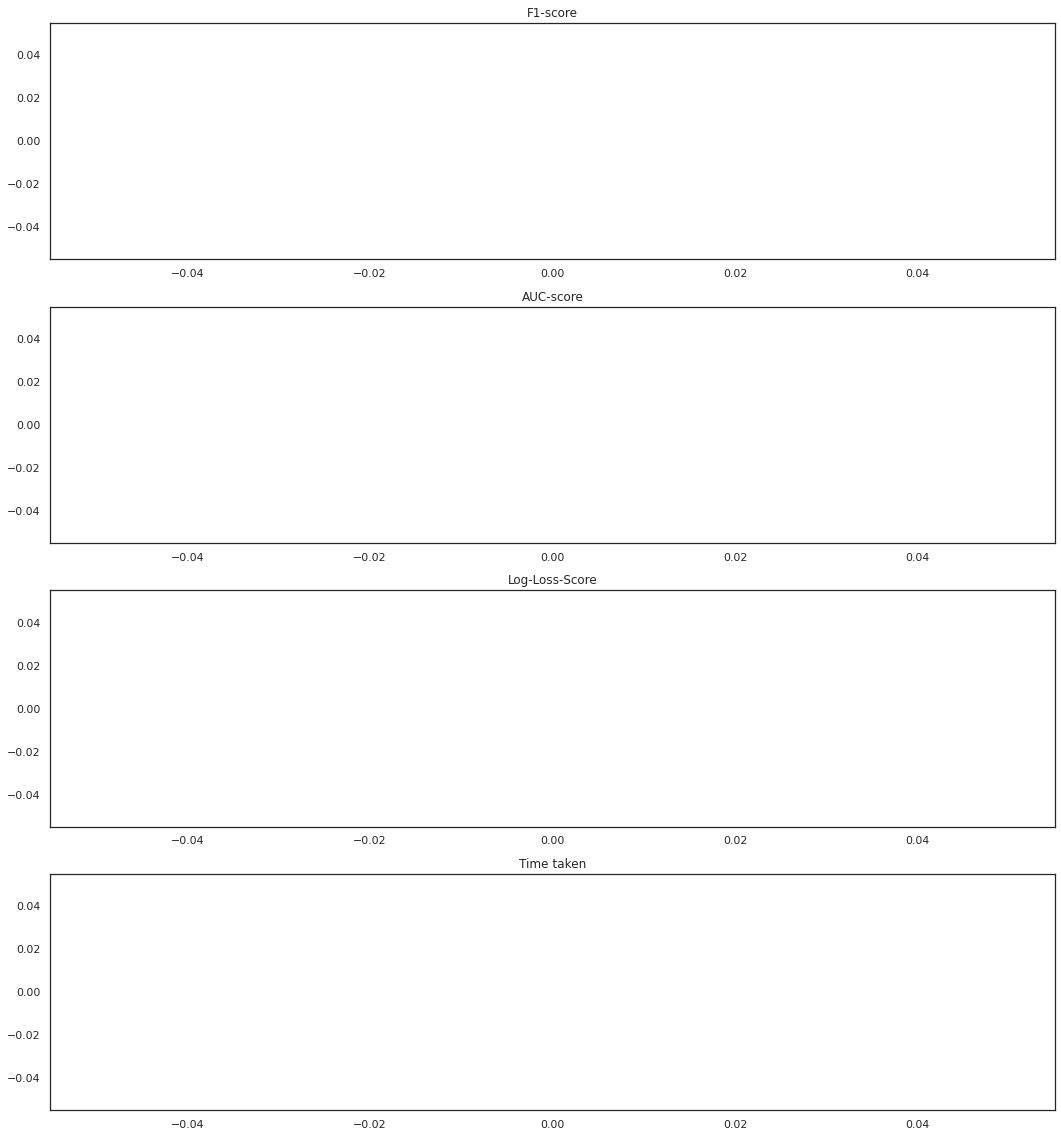

In [35]:
## plot the performance metric scores
fig, ax = plt.subplots(4, 1, figsize=(18, 20))

ax[0].bar(tuned.model, tuned.f1score)
ax[0].set_title('F1-score')

ax[1].bar(tuned.model, tuned.rocauc)
ax[1].set_title('AUC-score')

ax[2].bar(tuned.model, tuned.logloss)
ax[2].set_title('Log-Loss-Score')

ax[3].bar(tuned.model, tuned.timetaken)
ax[3].set_title('Time taken')

# Fine-tune figure; make subplots farther from each other, or nearer to each other.
fig.subplots_adjust(hspace=0.2, wspace=0.2)

In [36]:
# plot the ROC curves
plt.figure(figsize=(10,10))

# model_name = [gnb, bnb, mnb, logr, knn, dt, rf, xgb, svc, lsvc]
model_name = [gnb, bnb, mnb, logr, knn, dt, rf, svc, lsvc]

for i in range(len(model_name)-1):
    y_pred = model_name[i].predict_proba(X_test)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    plt.plot(fpr, tpr, lw=3, label=tuned.model[i] + ' (area = %0.3f)' % auc(fpr, tpr))

y_pred = lsvc.predict(X_test)   # linearsvc has no attribute 'predict_proba'
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, lw=3, label='LinearSVC (area = %0.3f)' % auc(fpr, tpr))

plt.plot([0, 1], [0, 1], color='navy', lw=1.5, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate', fontsize=13)
plt.ylabel('True Positive Rate', fontsize=14)
plt.title('Receiver Operating Characteristic', fontsize=17)
plt.legend(loc='lower right', fontsize=13)
plt.show()

KeyError: ignored

<Figure size 720x720 with 0 Axes>

In [37]:
# see how model confusion matrix varies with threshold
bestmodel = rf

def make_confusion_matrix(model, threshold=0.5):
    # Predict class 1 if probability of being in class 1 is greater than threshold
    # (bestmodel.predict(X_test) is done automatically with a threshold of 0.5)
    y_pred = (bestmodel.predict_proba(X_test)[:, 1] >= threshold)
    conf = confusion_matrix(y_test, y_pred)
    plt.figure(figsize = [5,5])
    sns.heatmap(conf, cmap=plt.cm.Blues, annot=True, square=True, fmt='d',
           xticklabels=['no attrition', 'attrition'],
           yticklabels=['no attrition', 'attrition']);
    plt.xlabel('Prediction')
    plt.ylabel('Actual')
# Let's see how the confusion matrix changes with changes to the threshold 
from ipywidgets import interactive, FloatSlider
# bestmodel = LogisticRegression(C = optimal_c)
# bestmodel.fit(X_train, y_train)
interactive(lambda threshold: make_confusion_matrix(bestmodel, threshold), threshold=(0.0,1.0,0.01))

interactive(children=(FloatSlider(value=0.5, description='threshold', max=1.0, step=0.01), Output()), _dom_cla…

In [38]:
# to check if over-sampling can improve the model performance (not for XGBoost)
bestmodel = rf

# baseline model performance (before over-sampling)
print('(Original) Baseline X_train.shape:', X_train.shape)
print(pd.value_counts(pd.Series(y_train)))
bestmodel.fit(X_train, y_train)
y_pred = bestmodel.predict(X_test)
print('Model accuracy is', accuracy_score(y_test, y_pred))
print('Model accuracy is', bestmodel.score(X_test, y_test))   # same result (.score uses accuracy)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# re-run model with resampled data using SMOTE over-sampling
# handling imbalance data: create fake sample data to add to the minority class to balance it out.
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=SEED)
X_train_sm, y_train_sm = sm.fit_sample(X_train, y_train.ravel())
print('\nAfter SMOTE over-sampling X_train_sm.shape:', X_train_sm.shape)
print(pd.value_counts(pd.Series(y_train_sm)))
bestmodel_sm = bestmodel.fit(X_train_sm, y_train_sm)
y_pred = bestmodel_sm.predict(X_test)
print('Model accuracy is', accuracy_score(y_test, y_pred))
print('Model accuracy is', bestmodel_sm.score(X_test, y_test))   # same results (.score uses accuracy)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

(Original) Baseline X_train.shape: (1176, 29)
0    986
1    190
Name: Attrition, dtype: int64
Model accuracy is 0.8401360544217688
Model accuracy is 0.8401360544217688
              precision    recall  f1-score   support

           0       0.85      0.99      0.91       247
           1       0.50      0.06      0.11        47

    accuracy                           0.84       294
   macro avg       0.67      0.53      0.51       294
weighted avg       0.79      0.84      0.78       294

[[244   3]
 [ 44   3]]

After SMOTE over-sampling X_train_sm.shape: (1972, 29)
1    986
0    986
dtype: int64
Model accuracy is 0.8197278911564626
Model accuracy is 0.8197278911564626
              precision    recall  f1-score   support

           0       0.87      0.92      0.90       247
           1       0.41      0.28      0.33        47

    accuracy                           0.82       294
   macro avg       0.64      0.60      0.61       294
weighted avg       0.80      0.82      0.81      

In [39]:
# run SMOTE and this cell, then re-run baseline model performance and tuned model performance (long bunch of code)
# have to turn off XGBoost (after over-sampling)
X_train = X_train_sm
y_train = y_train_sm

In [ ]:
#!pip install pycaret

In [28]:
import pycaret

In [29]:
from pycaret.classification import *
clf = setup(df, target = 'Attrition')

,Description,Value
0,session_id,4386
1,Target,Attrition
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(1470, 30)"
5,Missing Values,False
6,Numeric Features,9
7,Categorical Features,20
8,Ordinal Features,False
9,High Cardinality Features,False


In [30]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8697,0.8087,0.2958,0.6609,0.4036,0.3432,0.3801,0.389
ridge,Ridge Classifier,0.8658,0.0000,0.2304,0.6775,0.3261,0.2755,0.3275,0.017
lda,Linear Discriminant Analysis,0.8658,0.8226,0.4162,0.5732,0.4695,0.3980,0.4102,0.039
ada,Ada Boost Classifier,0.8590,0.7728,0.3400,0.5438,0.4072,0.3360,0.3517,0.166
et,Extra Trees Classifier,0.8590,0.7859,0.0837,0.6250,0.1420,0.1227,0.1984,0.515
lightgbm,Light Gradient Boosting Machine,0.8590,0.7931,0.2179,0.6117,0.3122,0.2543,0.2988,0.140
gbc,Gradient Boosting Classifier,0.8570,0.8027,0.2179,0.5287,0.2973,0.2404,0.2706,0.371
rf,Random Forest Classifier,0.8531,0.7912,0.0583,0.3833,0.0995,0.0813,0.1243,0.553
knn,K Neighbors Classifier,0.8287,0.5898,0.0825,0.3904,0.1320,0.0687,0.1049,0.123
svm,SVM - Linear Kernel,0.7929,0.0000,0.1067,0.0818,0.0583,0.0188,0.0289,0.033


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=4386, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [40]:
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8932,0.7811,0.4000,0.7500,0.5217,0.4678,0.4972
1,0.8544,0.8250,0.2000,0.5000,0.2857,0.2209,0.2499
2,0.8835,0.8599,0.2500,1.0000,0.4000,0.3602,0.4687
3,0.8641,0.8592,0.2500,0.6667,0.3636,0.3047,0.3511
4,0.9029,0.7557,0.4375,0.8750,0.5833,0.5352,0.5765
5,0.8350,0.7945,0.1875,0.4286,0.2609,0.1837,0.2037
6,0.8447,0.8161,0.2500,0.5000,0.3333,0.2563,0.2761
7,0.8544,0.7744,0.2500,0.5714,0.3478,0.2797,0.3102
8,0.8431,0.7510,0.2000,0.4286,0.2727,0.1976,0.2158
9,0.9216,0.8697,0.5333,0.8889,0.6667,0.6253,0.6516


In [47]:
tuned_lr = tune_model(lr)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9029,0.7765,0.4667,0.7778,0.5833,0.5322,0.5545
1,0.8835,0.8189,0.2667,0.8000,0.4000,0.3529,0.4190
2,0.8932,0.8707,0.5625,0.6923,0.6207,0.5593,0.5634
3,0.8932,0.7931,0.3125,1.0000,0.4762,0.4343,0.5267
4,0.8738,0.8491,0.4375,0.6364,0.5185,0.4487,0.4592
5,0.8641,0.7134,0.1250,1.0000,0.2222,0.1944,0.3281
6,0.8544,0.8455,0.3125,0.5556,0.4000,0.3244,0.3419
7,0.8641,0.7723,0.3125,0.6250,0.4167,0.3493,0.3763
8,0.8529,0.7778,0.2000,0.5000,0.2857,0.2202,0.2491
9,0.9314,0.8667,0.5333,1.0000,0.6957,0.6610,0.7026


In [49]:
!pip install shap

     |████████████████████████████████| 371 kB 5.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for shap: filename=shap-0.40.0-cp37-cp37m-linux_x86_64.whl size=509236 sha256=b812cb4b3992ce0c1a2f65065fd076ed32db83b34c6be186c29f302b2dd28b63
  Stored in directory: /root/.cache/pip/wheels/ec/35/84/e304841ac4b910bc95fe9a6e5302eb2507b4333728851dcbfb
Successfully built shap


In [50]:
import shap

In [51]:
interpret_model(tuned_lr, plot = 'correlation')

TypeError: ignored

In [52]:
evaluate_model(tuned_lr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

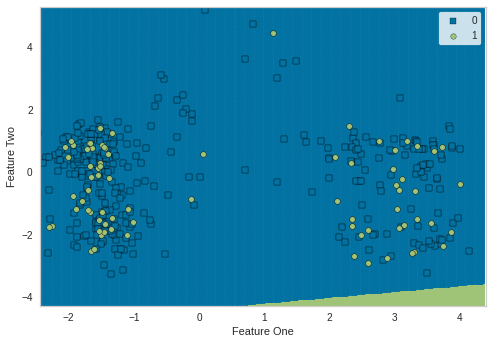

In [53]:
plot_model(tuned_lr, plot = 'boundary')

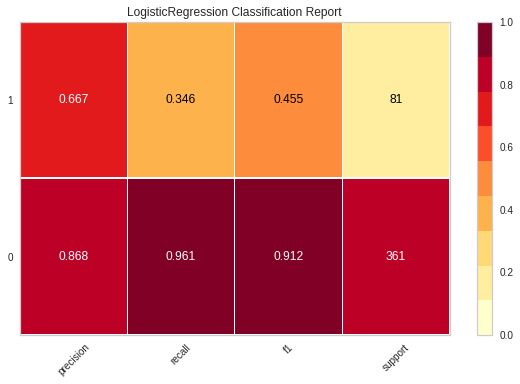

In [55]:
plot_model(tuned_lr, plot = 'class_report')

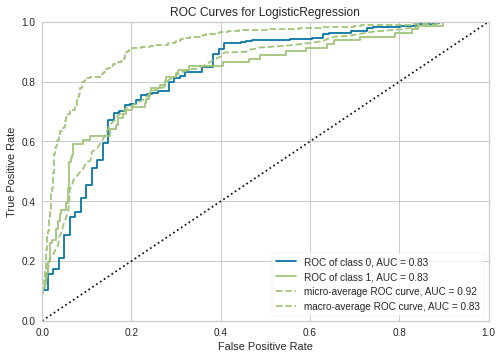

In [56]:
plot_model(tuned_lr)

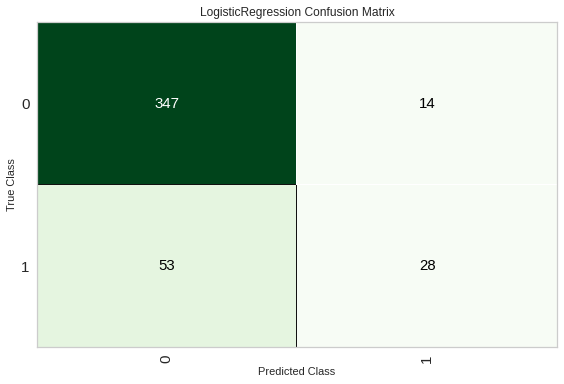

In [57]:
plot_model(tuned_lr, plot = 'confusion_matrix')

In [68]:
save_model(tuned_lr, model_name = 'LR_Attrition')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='Attrition',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_st...
                 ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                 ('dfs', 'passthrough'), ('pca', 'passthrough'),
                 ['trained_model',
                  LogisticRegression(C=4.772, class_weight={}, dual=False,
                 

In [76]:
from sklearn.externals import joblib

ImportError: ignored

In [78]:
import pickle

In [79]:
pkl_filename = "pickle_model.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(tuned_lr, file)

In [80]:
# Load from file
with open(pkl_filename, 'rb') as file:
    pickle_model = pickle.load(file)

In [81]:
# Calculate the accuracy score and predict target values
score = pickle_model.score(Xtest, Ytest)
print("Test score: {0:.2f} %".format(100 * score))
Ypredict = pickle_model.predict(Xtest)

NameError: ignored

In [83]:
python save_model_pickle.py

SyntaxError: ignored

In [73]:
load_lr_model =pickle.load(open(finalized_model,'wb'))

NameError: ignored

In [84]:
df.to_csv('atrition.csv')